In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import json
import matplotlib.patches as patches

In [2]:
def add_bbox(fig, ax, coordinates, **kwargs):
    size = fig.get_size_inches() * fig.dpi
    p = coordinates
    rect = patches.Rectangle(
        (
            p[0][0],
            p[0][1]
        ),
        (p[1][0] - p[0][0]),
        (p[1][1] - p[0][1]),
        clip_on=False, transform=ax.transAxes, **kwargs)

    ax.add_patch(rect)
    return fig, ax


/var/folders/v4/bv023v71755fpxk6jz8qbnyc0000gn/T/ipykernel_1554/3836484581.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


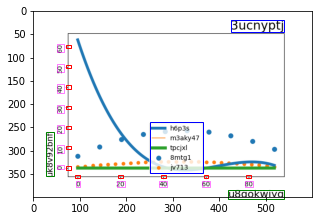

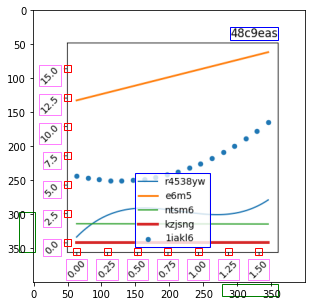

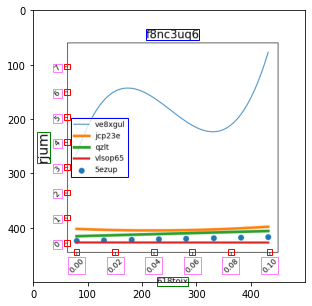

In [5]:
import matplotlib.image as img

n = 3
for i in range(n):
    image = img.imread(f'dataset/{i}/{i}.png')

    fig, ax = plt.subplots(figsize=(5,5))

    ax.imshow(image)

    with open(f'dataset/{i}/{i}.json', 'r') as f:
        data = json.load(f)

    bbox_pos = data['bbox_coordinates']
    xticks_positions = data['xticks_positions']
    yticks_positions = data['yticks_positions']
    
    different_coordinates = ['title_coordinates', 'xlabel_coordinates', 
                             'ylabel_coordinates', 'legend_coordinates']
    colors = ['b', 'g', 'g', 'b']
    
    for i, coords_label in enumerate(different_coordinates):          
        fig, ax = add_bbox(fig, ax, data[coords_label],
                           linewidth=1, edgecolor=colors[i], facecolor='none')

 
    for p in data['xticks_positions'] + data['yticks_positions']:
        fig, ax = add_bbox(fig, ax, p,
                           linewidth=1, edgecolor='r', facecolor='none')
        
    for tick in data['ticks']:
        fig, ax = add_bbox(fig, ax, tick['coordinates'],
                           linewidth=0.5, edgecolor='magenta', facecolor='none')
        
    fig.show()
